 WE ASSUME THAT WE SHOULD DO THE CLASSIFICATION BASED ON THE FINE GRAINED MODELS

In [1]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import os,shutil
folders=os.listdir("Images")


In [3]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes=['COVID','Normal']

In [4]:
for c in classes:
    p=os.path.join("Val_images/",c)
    print(p)
    if not os.path.isdir(p):
        os.mkdir(p)

Val_images/COVID
Val_images/Normal


In [5]:
SPLIT=0.9
for f in os.listdir("Images"):
    path="Images/"+f
    imgs=os.listdir(path)
    
    split_size=int(SPLIT*len(imgs))
    files_to_move=imgs[split_size:]
    #print(len(files_to_move))
    
    for img_f in files_to_move:
        src=os.path.join(path,img_f)
        dest=os.path.join("Val_images/"+f,img_f)
        #shutil.move(src,dest)
        #print(src)
        #print(dest)

In [6]:
train_path='Images'
val_path='Val_images'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [8]:
#WE will be using a sequential CNN Layers

In [9]:
model=Sequential()
model.add(Convolution2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2)) 
model.add(Dropout(0.25)) 

model.add(Convolution2D(68,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25)) 

model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 68)      39236     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 68)       0         
 2D)                                                    

In [10]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
train_gen=ImageDataGenerator(rescale=1.0/255,
                            rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.3,
                             horizontal_flip=True
                            )
test_gen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_gen.flow_from_directory(
"Images/",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 12426 images belonging to 2 classes.


In [12]:
val_gen=ImageDataGenerator(rescale=1.0/255)
#Data normalisation is done
val_generator=val_gen.flow_from_directory(
"Val_images/",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1382 images belonging to 2 classes.


In [13]:
hist=model.fit_generator(
train_generator,
epochs=4,
steps_per_epoch=8,
validation_data=val_generator,
validation_steps=4
)
#target size in 

C:\Users\91893\AppData\Local\Temp\ipykernel_6028\3499145104.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(


Epoch 1/4
8/8 [==============================] - 31s 4s/step - loss: 1.0913 - accuracy: 0.5117 - val_loss: 0.6402 - val_accuracy: 0.7500
Epoch 2/4
8/8 [==============================] - 27s 3s/step - loss: 0.5940 - accuracy: 0.7461 - val_loss: 0.6653 - val_accuracy: 0.6562
Epoch 3/4
8/8 [==============================] - 26s 3s/step - loss: 0.6490 - accuracy: 0.7031 - val_loss: 0.6160 - val_accuracy: 0.7500
Epoch 4/4
8/8 [==============================] - 29s 4s/step - loss: 0.6505 - accuracy: 0.6875 - val_loss: 0.6492 - val_accuracy: 0.7422


In [14]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

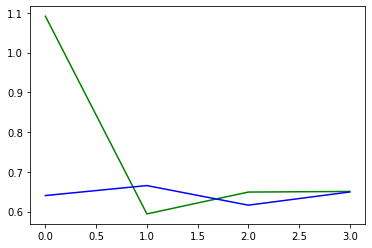

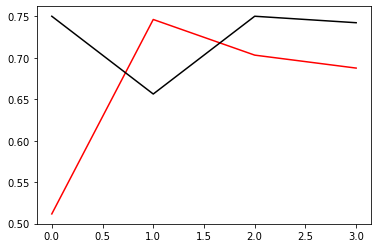

In [15]:
plt.figure(0)
plt.plot(loss,'g')
plt.plot(val_loss,'b')
plt.show()

plt.plot(acc,'r')
plt.plot(val_acc,'black')
plt.show()

In [16]:
model.evaluate_generator(train_generator)

C:\Users\91893\AppData\Local\Temp\ipykernel_6028\326654268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.6510733962059021, 0.738129734992981]

In [17]:
model.evaluate_generator(val_generator)

C:\Users\91893\AppData\Local\Temp\ipykernel_6028\359034756.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(val_generator)


[0.649690568447113, 0.7380607724189758]

#### 